In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [4]:
mat1 = material(1.0^2,1.0)
mat2 = material(epstable("silver"),1.0);

In [5]:
w,d = 168.,10.
rc = 2.
Nc,Nw,Nd = 3,45,5
xC = (0,0);

In [6]:
rod = Rod(w,d,rc,Nc,Nw,Nd);

In [7]:
xmin,ymin = -200.0,-200.0
xmax,ymax = 200.0,200.0
Δx,Δy = 20.0,20.0

xA = collect(xmin:Δx:xmax)
yA = collect(ymin:Δy:ymax)
Xin,Xout,Yin,Yout = getMesh(xA,yA,rod);

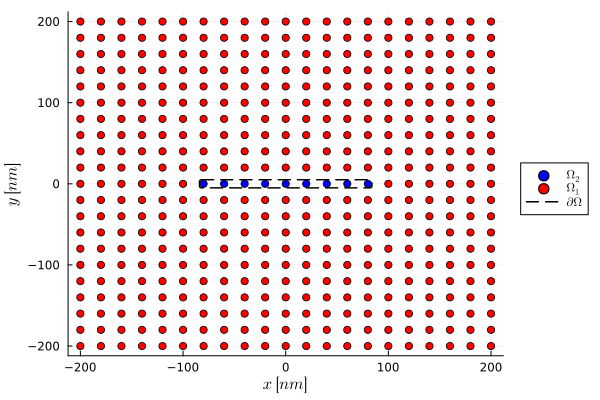

In [8]:
gr()
X,Y = getSurfPoints(rod)
scatter(Xin,Yin,c=:blue,label=L"\Omega_2")
scatter!(Xout,Yout,c=:red,label=L"\Omega_1")
plot!(X,Y,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega",xlabel=L"x~[nm]",ylabel=L"y~[nm]",legend=:outerright)

In [9]:
dThr = 50.
m = 2

2

In [10]:
i = 1

k0 = 2π/690
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = -90.

-90.0

In [11]:
H,ϕ = getHϕ(m,rod,k0,n₂,n₁,dThr,α);

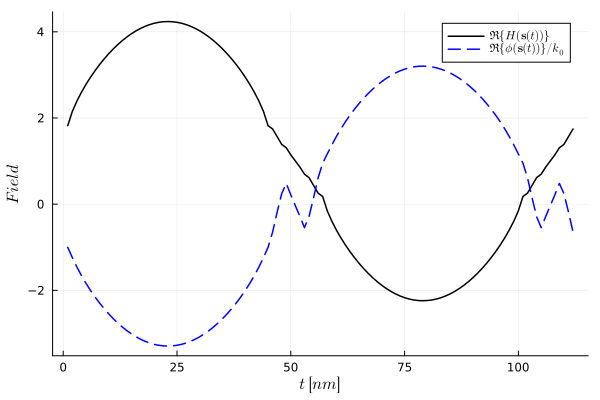

In [12]:
gr()
plot(real.(H[:,1]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,1])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:topright)

In [13]:
HOut = getHfielOutsie(k0,n₁,m,dThr,rod,Xout,Yout,α,H,ϕ);

In [14]:
HIn = getHfieldInside(k0,n₂,m,dThr,rod,Xin,Yin,α,H,ϕ);

In [15]:
grd = [Xout Yout abs.(HOut);
        Xin Yin abs.(HIn)];


In [16]:
ind = sortperm(grd[:,2])

ogrd = grd[ind,:]


ind2 = sortperm(ogrd[:,1])

ogrd2 = ogrd[ind2,:];

In [17]:
imagenH = reshape(ogrd2[:,3],(length(yA),length(xA)));

In [18]:
plotly()
surface(imagenH)

In [19]:
plot(xA,imagenH[11,:],label="")

# ========================================

In [20]:
μ₀ = 1.25663706144e-6
ε₀ = 8.85418781762e-12


c1 = √(μ₀/ε₀)*(1/n₁)
c2 = √(μ₀/ε₀)*(1/n₂)
c2 = abs(c2)

79.78207584749117

In [21]:
Eo = Get_E0(k0,n₁,Xout,Yout,α);

In [22]:
Eout = getEfieldOutside(k0,n₁,m,dThr,rod,Xout,Yout,α,H,ϕ);

In [23]:
Ein = getEfieldInside(k0,n₂,m,dThr,rod,Xin,Yin,α,H,ϕ);

In [24]:
eff = [Xout Yout norm.(Eout)./c1;
        Xin Yin norm.(Ein)./c2];

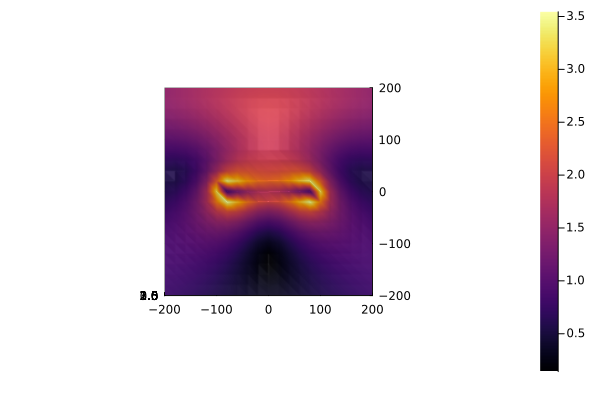

In [25]:
gr()
surface(eff[:,1],eff[:,2], eff[:,3],camera = (0,90))

In [26]:
ind = sortperm(eff[:,2])

ogrde = eff[ind,:]


ind2 = sortperm(ogrde[:,1])

ogrde2 = ogrde[ind2,:];

In [27]:
imagenE = reshape(ogrde2[:,3],(length(yA),length(xA)));

In [28]:
plotly()
surface(imagenE)

In [29]:
plot(xA,imagenE[11,:],label="")

In [30]:
plot( norm.(Ein)./c2)